### Exercises II

### Let's set up an example scenario as perspective for our regression exercises using the Zillow dataset.

### As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the obervations from 2017.

### In these exercises, you will complete the first step toward the above goal: acquire and prepare the necessary Zillow data from the zillow database in the Codeup database server.



### 1. Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.

In [1]:
import pandas as pd
import numpy as np
import os
from env import host, user, password

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Remove the angry pink boxes
import warnings
warnings.filterwarnings("ignore")

In [2]:

def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup server and we will retrieve data from zillow database.
    It takes in a string name of a database as an argument.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [3]:
def new_zillow_data():
    '''
    This function reads the reads zillow database data from the Codeup Server into a df,
    write it to a csv file, and returns the df.
    '''
    # Create SQL query.
    sql_query = """ 
    SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
FROM properties_2017

JOIN propertylandusetype USING(propertylandusetypeid)

WHERE propertylandusedesc IN ("Single Family Residential",                       
                              "Inferred Single Family Residential")
    """
    
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('zillow'))
    
    
    
    return df

In [4]:
df = new_zillow_data()
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


### 2. Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaninful; remember to document your process and decisions using markdown and code commenting where helpful.

In [5]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152864 entries, 0 to 2152863
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2152853 non-null  float64
 1   bathroomcnt                   2152853 non-null  float64
 2   calculatedfinishedsquarefeet  2144379 non-null  float64
 3   taxvaluedollarcnt             2152371 non-null  float64
 4   yearbuilt                     2143526 non-null  float64
 5   taxamount                     2148422 non-null  float64
 6   fips                          2152864 non-null  float64
dtypes: float64(7)
memory usage: 115.0 MB


In [6]:
# Getting rows and column of DataFrame
df.shape

(2152864, 7)

In [7]:
# Display readable summary statistics for numeric columns.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152853.0,3.287195,0.954757,0.00,3.0000,3.000,4.0000,25.00
bathroomcnt,2152853.0,2.230687,0.999281,0.00,2.0000,2.000,3.0000,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.0000,1623.000,2208.0000,952576.00
taxvaluedollarcnt,2152371.0,461896.052361,699675.940048,1.00,188170.0000,327671.000,534527.0000,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.0000,1958.000,1976.0000,2016.00
taxamount,2148422.0,5634.863752,8178.908996,1.85,2534.9725,4108.945,6414.3175,1337755.86
fips,2152864.0,6048.377330,20.433289,6037.00,6037.0000,6037.000,6059.0000,6111.00


In [8]:
# renaming columns
df = df.rename(columns = {'bedroomcnt':'bedrooms', 
                          'bathroomcnt':'bathrooms', 
                          'calculatedfinishedsquarefeet':'area',
                          'taxvaluedollarcnt':'tax_value', 
                          'yearbuilt':'year_built'})

In [9]:
df.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


### Acquire and summarize takeaways
- Not Null Count is different for each column, we will make them same by deleting rows.
- Bedroomcnt makes more sennse to be in int.
- Year Built makes more sense to be in int.
- fips makes more sense to be in object.


In [10]:
# Getting count of null values in each columns of our DataFrame

df.isnull().sum()


bedrooms        11
bathrooms       11
area          8485
tax_value      493
year_built    9338
taxamount     4442
fips             0
dtype: int64

In [11]:
# We can visualize the row(s) in each column containing at least one np.nan except fips
df[df.bedrooms.isna()]

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
107763,NaN,NaN,NaN,67366.0,1926.0,780.54,6059.0
118612,NaN,NaN,NaN,43992.0,1946.0,541.64,6059.0
193993,NaN,NaN,1348.0,840698.0,1952.0,NaN,6059.0
1141340,NaN,NaN,200.0,188972.0,NaN,NaN,6037.0
1324609,NaN,NaN,990.0,435000.0,1906.0,NaN,6037.0
1442976,NaN,NaN,NaN,273196.0,NaN,NaN,6037.0
1647347,NaN,NaN,400.0,28347.0,1954.0,NaN,6037.0
1701027,NaN,NaN,NaN,407930.0,1926.0,NaN,6037.0
1722708,NaN,NaN,NaN,477161.0,NaN,NaN,6037.0
1776423,NaN,NaN,NaN,38855.0,NaN,NaN,6037.0


In [12]:
df[df.bathrooms.isna()]

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
107763,NaN,NaN,NaN,67366.0,1926.0,780.54,6059.0
118612,NaN,NaN,NaN,43992.0,1946.0,541.64,6059.0
193993,NaN,NaN,1348.0,840698.0,1952.0,NaN,6059.0
1141340,NaN,NaN,200.0,188972.0,NaN,NaN,6037.0
1324609,NaN,NaN,990.0,435000.0,1906.0,NaN,6037.0
1442976,NaN,NaN,NaN,273196.0,NaN,NaN,6037.0
1647347,NaN,NaN,400.0,28347.0,1954.0,NaN,6037.0
1701027,NaN,NaN,NaN,407930.0,1926.0,NaN,6037.0
1722708,NaN,NaN,NaN,477161.0,NaN,NaN,6037.0
1776423,NaN,NaN,NaN,38855.0,NaN,NaN,6037.0


###### Similary we can do for other columns as well.

In [13]:
# Check for any Null values in each column of our DataFrame.

df.isnull().any()

bedrooms       True
bathrooms      True
area           True
tax_value      True
year_built     True
taxamount      True
fips          False
dtype: bool

In [14]:
# Return the names for any columns in our DataFrame with any Null values.

df.columns[df.isnull().any()]

Index(['bedrooms', 'bathrooms', 'area', 'tax_value', 'year_built',
       'taxamount'],
      dtype='object')

In [16]:
# Calculating mean of null values rows
df.isnull().mean()

bedrooms      0.000005
bathrooms     0.000005
area          0.003941
tax_value     0.000229
year_built    0.004337
taxamount     0.002063
fips          0.000000
dtype: float64

In [17]:
# Drop all rows with any Null values, assign to df, and verify. Since we are dealing with large data dropping one 
# with null data should not make a difference

df = df.dropna()
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152863
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    2140235 non-null  float64
 1   bathrooms   2140235 non-null  float64
 2   area        2140235 non-null  float64
 3   tax_value   2140235 non-null  float64
 4   year_built  2140235 non-null  float64
 5   taxamount   2140235 non-null  float64
 6   fips        2140235 non-null  float64
dtypes: float64(7)
memory usage: 130.6 MB


In [18]:
df

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0
...,...,...,...,...,...,...,...
2152857,4.0,4.0,4375.0,422400.0,2015.0,13877.56,6037.0
2152859,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152860,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152862,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [19]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152863
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    2140235 non-null  float64
 1   bathrooms   2140235 non-null  float64
 2   area        2140235 non-null  float64
 3   tax_value   2140235 non-null  float64
 4   year_built  2140235 non-null  float64
 5   taxamount   2140235 non-null  float64
 6   fips        2140235 non-null  float64
dtypes: float64(7)
memory usage: 130.6 MB


In [20]:
# Converting bedroomcnt to int

df['bedrooms']= df.bedrooms.astype('int')


In [ ]:
# Changing datatypes of the columns

df['bedrooms']= df.bedrooms.astype('int')
df['year_built'] = df.year_built.astype('int')
df['fips'] = df.fips.astype('object')

# dropping rows with absured meaning
df = df[df.bathrooms > 0]
df = df[df.bedrooms > 0]


In [21]:
# It make more sense to make year int because year cannot be in float, further by keeping it that way we can do
# calculation of year_built if needed.
df['year_built'] = df.year_built.astype('int')

In [22]:
# Since FIPS stands for Federal Information Processing Standards. It sounds like its code and we don't need to
# mathematical operation on it. So I will keep it as object datatype
df['fips'] = df.fips.astype('object')

In [23]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152863
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    2140235 non-null  int64  
 1   bathrooms   2140235 non-null  float64
 2   area        2140235 non-null  float64
 3   tax_value   2140235 non-null  float64
 4   year_built  2140235 non-null  int64  
 5   taxamount   2140235 non-null  float64
 6   fips        2140235 non-null  object 
dtypes: float64(4), int64(2), object(1)
memory usage: 130.6+ MB


In [24]:
df.shape

(2140235, 7)

In [25]:
# Lets get a house with bebrooms count of 0
df[df.bedrooms == 0]

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
11,0,0.0,1200.0,5328.0,1972,91.60,6037.0
14,0,0.0,171.0,6920.0,1973,255.17,6037.0
15,0,0.0,203.0,14166.0,1960,163.79,6037.0
866,0,0.0,220.0,13840.0,1988,327.80,6037.0
2306,0,0.0,1776.0,79574.0,1989,1137.90,6037.0
...,...,...,...,...,...,...,...
2146661,0,0.0,676.0,234580.0,1922,3013.57,6037.0
2149055,0,0.0,938.0,56733.0,1978,986.86,6037.0
2152506,0,0.0,240.0,31234.0,1942,414.04,6037.0
2152705,0,1.0,1490.0,152000.0,1930,3614.40,6037.0


In [26]:
# Deleting rows with bedroom count 0, since it makes no sense
df = df[df.bedrooms > 0]
df

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
4,4,2.0,3633.0,296425.0,2005,6941.39,6037.0
6,3,4.0,1620.0,847770.0,2011,10244.94,6037.0
7,3,2.0,2077.0,646760.0,1926,7924.68,6037.0
18,3,1.0,1244.0,169471.0,1950,2532.88,6037.0
19,3,2.0,1300.0,233266.0,1950,3110.99,6037.0
...,...,...,...,...,...,...,...
2152857,4,4.0,4375.0,422400.0,2015,13877.56,6037.0
2152859,4,3.0,2262.0,960756.0,2015,13494.52,6059.0
2152860,4,4.5,3127.0,536061.0,2014,6244.16,6059.0
2152862,3,2.5,1974.0,424353.0,2015,5302.70,6059.0


In [27]:
# Lets get a house with bathrooms count of 0
df[df.bathrooms == 0]

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
398,3,0.0,2239.0,396608.0,1988,4404.22,6111.0
753,3,0.0,2421.0,1111120.0,1976,12394.16,6111.0
1546,1,0.0,400.0,47682.0,1913,764.58,6037.0
10903,2,0.0,1008.0,41650.0,1952,458.54,6111.0
11456,1,0.0,272.0,9658.0,1930,168.86,6111.0
...,...,...,...,...,...,...,...
2142254,3,0.0,3096.0,479977.0,1989,5913.64,6111.0
2142432,4,0.0,3114.0,1162460.0,1987,12376.68,6111.0
2142487,5,0.0,3322.0,793673.0,1988,8455.52,6111.0
2142566,3,0.0,2044.0,337882.0,1989,3745.28,6111.0


In [28]:
# Deleting rows with bedroom count 0
df = df[df.bathrooms > 0]
df

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
4,4,2.0,3633.0,296425.0,2005,6941.39,6037.0
6,3,4.0,1620.0,847770.0,2011,10244.94,6037.0
7,3,2.0,2077.0,646760.0,1926,7924.68,6037.0
18,3,1.0,1244.0,169471.0,1950,2532.88,6037.0
19,3,2.0,1300.0,233266.0,1950,3110.99,6037.0
...,...,...,...,...,...,...,...
2152857,4,4.0,4375.0,422400.0,2015,13877.56,6037.0
2152859,4,3.0,2262.0,960756.0,2015,13494.52,6059.0
2152860,4,4.5,3127.0,536061.0,2014,6244.16,6059.0
2152862,3,2.5,1974.0,424353.0,2015,5302.70,6059.0


In [29]:
# Checking for house with area 0
df[df.area == 0]

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips


In [30]:
# Checking for house with tax_value 0
df[df.tax_value == 0]

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips


In [31]:
# House can have tax_value of 0 because some of the property can be taxexempt, so I would not drop the houses with
# tax_value of 0

In [32]:
# Checkinf for the house with year_built = 0
df[df.year_built == 0]

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips


In [33]:
# Since we don't have it, if we have them. I would delete them as well.
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2134909 entries, 4 to 2152863
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    2134909 non-null  int64  
 1   bathrooms   2134909 non-null  float64
 2   area        2134909 non-null  float64
 3   tax_value   2134909 non-null  float64
 4   year_built  2134909 non-null  int64  
 5   taxamount   2134909 non-null  float64
 6   fips        2134909 non-null  object 
dtypes: float64(4), int64(2), object(1)
memory usage: 130.3+ MB


### Visualize Distributions
We can plot histograms and/or boxplots to see the distributions of single variables and check for skewness, outliers, and unit scales. Note, we don't have to split our data before exploring single variables. We DO have to split our data before performing bi- and multi-variate exploration.
sns.displot()
We can use Seaborn's displot to display the binned values from a column.

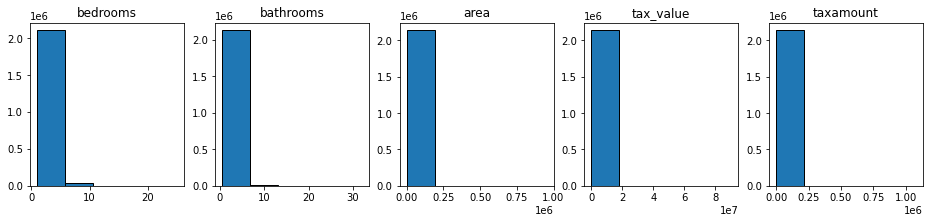

In [38]:


plt.figure(figsize=(16, 3))

# List of columns
cols = ['bedrooms', 'bathrooms', 'area', 'tax_value', 'taxamount']

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1, 5, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    df[col].hist(bins= 5, edgecolor='black')
    

    
    # Hide gridlines.
    plt.grid(False)

### Takeaways

- Outliers must exist in each column for the x-axis to have the range shown
- tax_value is looking like it has severe skew, due to a x-axis range that goes to 1e8

### Boxplots to see outliers
Seaborn's .boxplot will default to plotting all the numeric variables if we don't specify specific x and y values.

<AxesSubplot:>

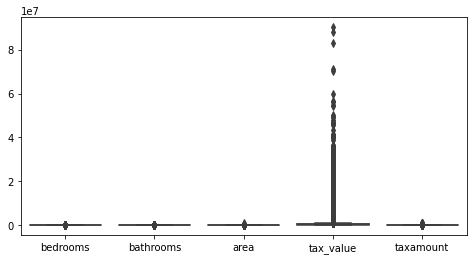

In [46]:

plt.figure(figsize=(8,4))

# Create boxplots for
sns.boxplot(data=df.drop(columns=['year_built', 'fips']))

tax_value has such a severe outlier problem, it is making the chart unreadable

In [ ]:
We can make box readable by making subplots.

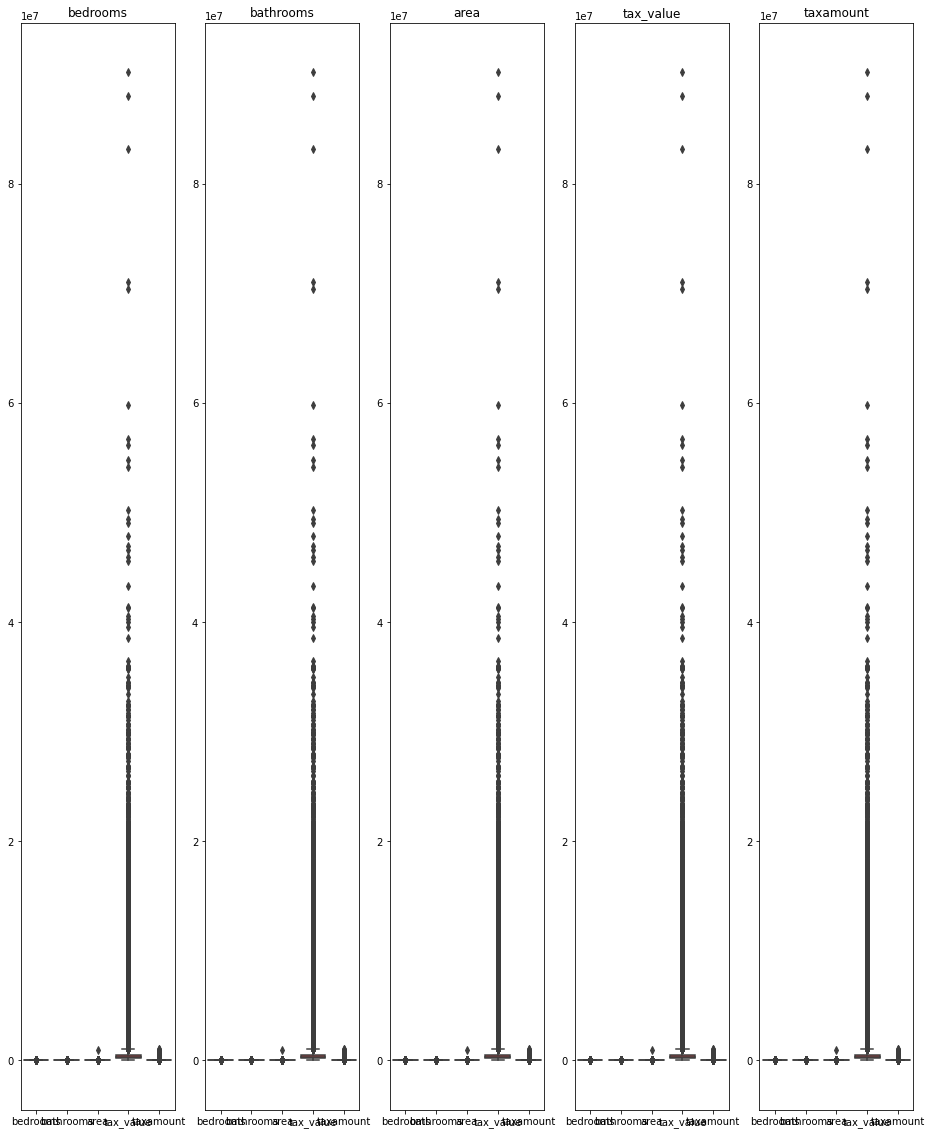

In [54]:
# List of columns
colu = [col for col in df.columns if col not in ['fips', 'year_built']]
plt.figure(figsize=(16, 20))
for i, col in enumerate(colu):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display boxplot for column.
    sns.boxplot(data=df[colu])

    # Hide gridlines.
    plt.grid(False)

plt.show()

What are the quartiles for each of these columns?

In [57]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,bedrooms,bathrooms,area,tax_value,year_built,taxamount
count,2.13491e+06,2.13491e+06,2.13491e+06,2.13491e+06,2.13491e+06,2.13491e+06
mean,3.30833,2.24519,1864.18,460877,1960.99,5619.63
std,0.92116,0.985845,1162.4,674681,22.134,7784.64
min,1,0.5,1,22,1801,16.48
25%,3,2,1260,189628,1949,2546.7
50%,3,2,1624,328857,1958,4116.04
75%,4,3,2209,535000,1976,6415.76
max,25,32,952576,9.01885e+07,2016,1.0781e+06


### Takeaways

- Substantial outliers exist
- If we presume that we are going to use our data to build a model that focuses on median home values, then we can drop these outliers.

In [58]:
def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [ ]:
def remove_outliers_v2(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    # Create a column that will label our rows as containing an outlier value or not
    num_obs = df.shape[0]
    df['outlier'] = False
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # update the outlier label any time that the value is outside of boundaries
        df['outlier'] = np.where(((df[col] < lower_bound) | (df[col] > upper_bound)) & (df.outlier == False), True, df.outlier)
    
    df = df[df.outlier == False]
    df.drop(columns=['outlier'], inplace=True)
    print(f"Number of observations removed: {num_obs - df.shape[0]}")
        
    return df

In [59]:
df = remove_outliers(df, 1.5, ['bedrooms', 'bathrooms', 'area', 'tax_value', 'taxamount'])
df

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
6,3,4.0,1620.0,847770.0,2011,10244.94,6037.0
7,3,2.0,2077.0,646760.0,1926,7924.68,6037.0
18,3,1.0,1244.0,169471.0,1950,2532.88,6037.0
19,3,2.0,1300.0,233266.0,1950,3110.99,6037.0
20,3,2.0,1222.0,290492.0,1951,3870.25,6037.0
...,...,...,...,...,...,...,...
2152853,3,2.0,1917.0,408680.0,1946,4341.32,6111.0
2152854,4,2.0,1987.0,259913.0,1955,3175.66,6059.0
2152856,3,2.5,1809.0,405547.0,2012,4181.10,6059.0
2152862,3,2.5,1974.0,424353.0,2015,5302.70,6059.0


### Visualizing Data again

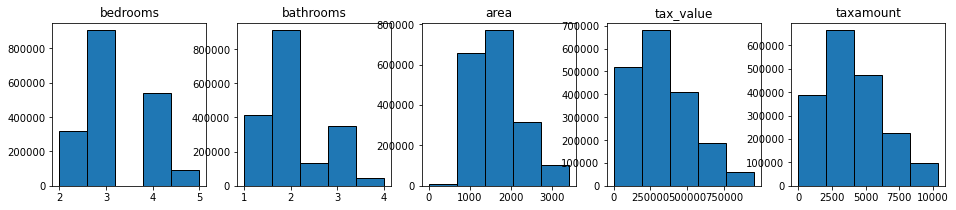

In [60]:

plt.figure(figsize=(16, 3))

# List of columns
cols = ['bedrooms', 'bathrooms', 'area', 'tax_value', 'taxamount']

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1, 5, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    df[col].hist(bins= 5, edgecolor='black')
    

    
    # Hide gridlines.
    plt.grid(False)

### Boxplot after removing outliers

<AxesSubplot:>

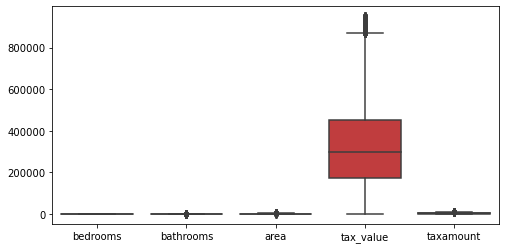

In [61]:

plt.figure(figsize=(8,4))

# Create boxplots for
sns.boxplot(data=df.drop(columns=['year_built', 'fips']))

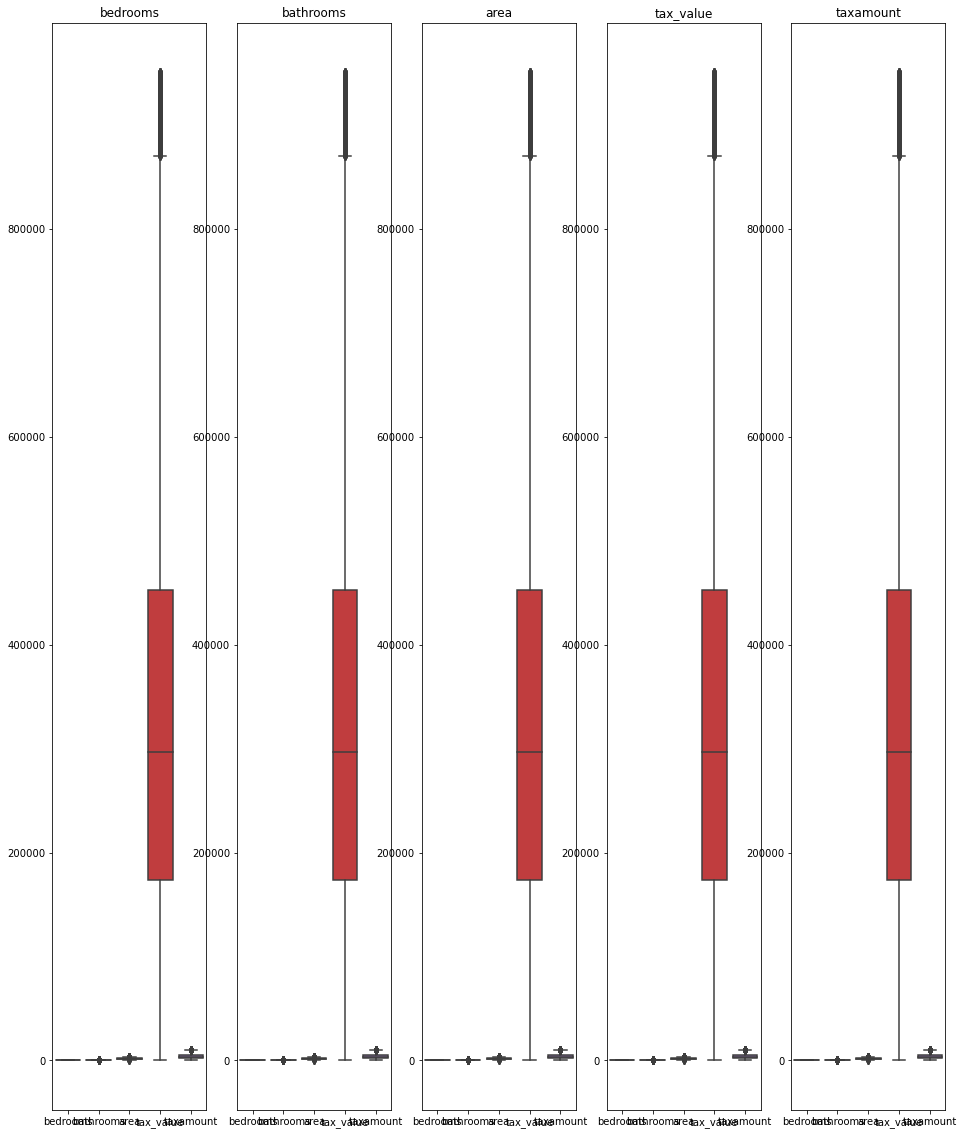

In [64]:
# List of columns
colu = [col for col in df.columns if col not in ['fips', 'year_built']]
plt.figure(figsize=(16, 20))
for i, col in enumerate(colu):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display boxplot for column.
    sns.boxplot(data=df[colu])
    

    # Hide gridlines.
    plt.grid(False)

plt.show()

### Takeaways

- Still a few outliers despite the relatively restrictive 1.5 * IQR setting for the upper/lower boundary
- No need to remove these outliers

In [66]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1854286 entries, 6 to 2152863
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1854286 non-null  int64  
 1   bathrooms   1854286 non-null  float64
 2   area        1854286 non-null  float64
 3   tax_value   1854286 non-null  float64
 4   year_built  1854286 non-null  int64  
 5   taxamount   1854286 non-null  float64
 6   fips        1854286 non-null  object 
dtypes: float64(4), int64(2), object(1)
memory usage: 113.2+ MB


In [67]:
# get value counts and decide on data types
cols = df.columns

for col in cols:
    
    print(col.upper())
    print(df[col].value_counts())
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print()

BEDROOMS
3    904826
4    539616
2    320442
5     89402
Name: bedrooms, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

BATHROOMS
2.00    909424
1.00    385677
3.00    351864
2.50    132322
4.00     31936
1.50     30713
3.50     12347
1.75         3
Name: bathrooms, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

AREA
1200.0    5091
1080.0    4313
1120.0    4286
1400.0    3776
1440.0    3617
          ... 
390.0        1
173.0        1
179.0        1
489.0        1
507.0        1
Name: area, Length: 3013, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

TAX_VALUE
450000.0    806
500000.0    753
400000.0    701
430000.0    677
440000.0    671
           ... 
562541.0      1
453301.0      1
496589.0      1
390141.0      1
773358.0      1
Name: tax_value, Length: 457377, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

YEAR_BUILT
1955    80451
1950    66875
1954    65522
1953    58745
1956    58053
        ...  
1823        1
1801        1
1807        1
1877        1
1874      

### Split the Data

In [69]:
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

In [70]:
train.shape, validate.shape, test.shape

((1038399, 7), (445029, 7), (370858, 7))

In [71]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
537465,3,2.5,1971.0,383099.0,1987,3895.40,6059.0
554109,4,2.0,1878.0,396577.0,1959,4952.22,6037.0
307369,2,2.0,1001.0,209965.0,1949,2528.27,6037.0
1311282,3,2.0,1474.0,63182.0,1955,1032.70,6059.0
1755945,3,2.0,1221.0,260804.0,1951,3364.06,6037.0


### 3. Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe witn no missing values in your wrangle.py file. Name your final function wrangle_zillow.

In [77]:
import pandas as pd
import numpy as np
import os
from env import host, user, password

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Remove the angry pink boxes
import warnings
warnings.filterwarnings("ignore")



def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup server and we will retrieve data from zillow database.
    It takes in a string name of a database as an argument.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

    
def new_zillow_data():
    '''
    This function reads the reads zillow database data from the Codeup Server into a df,
    write it to a csv file, and returns the df.
    '''
    # Create SQL query.
    sql_query = """ 
    SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
FROM properties_2017

JOIN propertylandusetype USING(propertylandusetypeid)

WHERE propertylandusedesc IN ("Single Family Residential",                       
                              "Inferred Single Family Residential")
    """
    
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('zillow'))
    
    # Converting columns into readable format
    df = df.rename(columns = {'bedroomcnt':'bedrooms', 
                          'bathroomcnt':'bathrooms', 
                          'calculatedfinishedsquarefeet':'area',
                          'taxvaluedollarcnt':'tax_value', 
                          'yearbuilt':'year_built'})
    # dropping null from df
    df = df.dropna()
    
    # Changing datatypes of the columns

    df['bedrooms']= df.bedrooms.astype('int')
    df['year_built'] = df.year_built.astype('int')
    df['fips'] = df.fips.astype('object')

    # dropping rows with absured meaning
    df = df[df.bathrooms > 0]
    df = df[df.bedrooms > 0]
    
    return df

def get_histogram(df):
    
    plt.figure(figsize=(16, 3))

    # List of columns
    cols = ['bedrooms', 'bathrooms', 'area', 'tax_value', 'taxamount']

    for i, col in enumerate(cols):
    
        # i starts at 0, but plot nos should start at 1
        plot_number = i + 1 
    
        # Create subplot.
        plt.subplot(1, 5, plot_number)
    
        # Title with column name.
        plt.title(col)
    
        # Display histogram for column.
        df[col].hist(bins= 5, edgecolor='black')
    

    
        # Hide gridlines.
        plt.grid(False)
        
def get_boxplot(df):        
    # List of columns
    colu = [col for col in df.columns if col not in ['fips', 'year_built']]
    plt.figure(figsize=(16, 20))
    for i, col in enumerate(colu):

        # i starts at 0, but plot nos should start at 1
        plot_number = i + 1 

        # Create subplot.
        plt.subplot(1, len(cols), plot_number)

        # Title with column name.
        plt.title(col)

        # Display boxplot for column.
        sns.boxplot(data=df[colu])
    

        # Hide gridlines.
        plt.grid(False)

    plt.show()
    
def prepare_zillow(df):
    ''' Prepare zillow data for exploration'''

    # removing outliers
    df = remove_outliers(df, 1.5, ['bedrooms', 'bathrooms', 'area', 'tax_value', 'taxamount'])
    
    # get distributions of numeric data
    get_histogram(df)
    get_boxplot(df)
    
    
    # train/validate/test split
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
          
    
    return train, validate, test 


def wrangle_zillow():
    '''Acquire and prepare data from Zillow database for explore'''
    train, validate, test = prepare_zillow(new_zillow_data())
    
    return train, validate, test

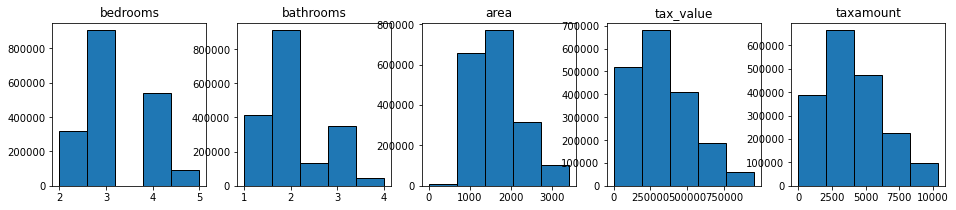

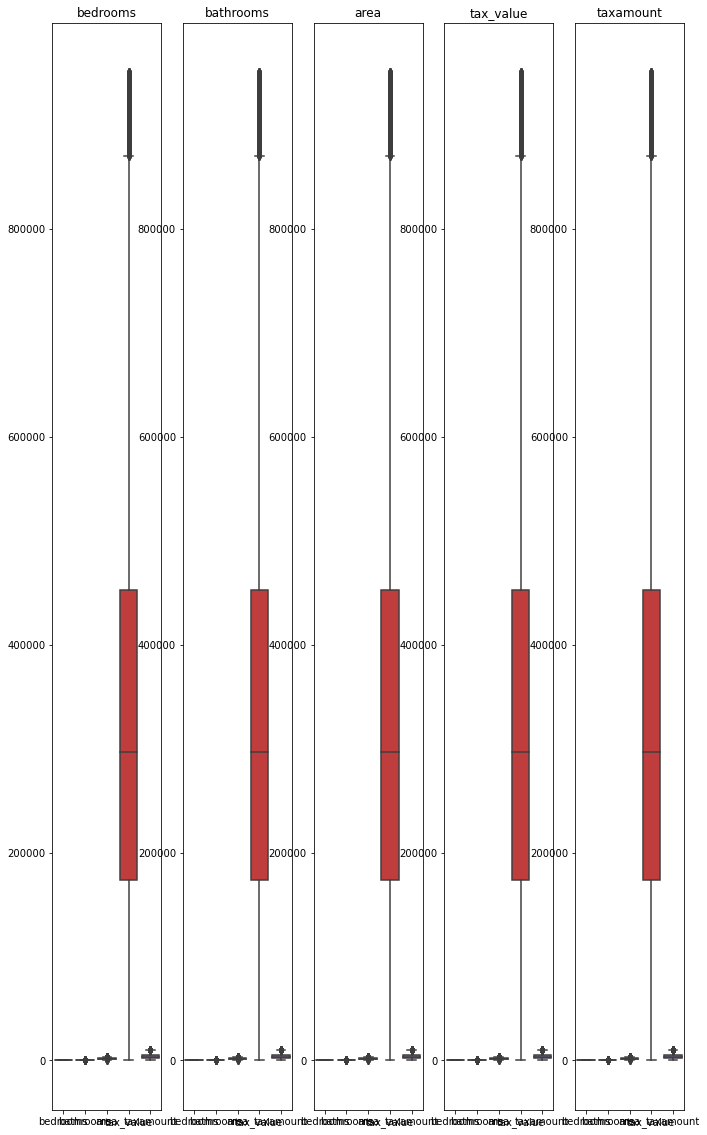

In [78]:
train, validate, test = wrangle_zillow()

In [79]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
537465,3,2.5,1971.0,383099.0,1987,3895.40,6059.0
554109,4,2.0,1878.0,396577.0,1959,4952.22,6037.0
307369,2,2.0,1001.0,209965.0,1949,2528.27,6037.0
1311282,3,2.0,1474.0,63182.0,1955,1032.70,6059.0
1755945,3,2.0,1221.0,260804.0,1951,3364.06,6037.0
